**Загрузка данных и первичное знакомство**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Загрузка данных train
train = pd.read_csv('./train.csv', nrows = 10000000)

In [3]:
# Загрузка данных questions и lectures
questions = pd.read_csv('./questions.csv')
lectures = pd.read_csv('./lectures.csv')

In [4]:
# Проверяем сколько памяти использует DataFrame train
train.memory_usage(deep=True)

Index                                   132
row_id                             80000000
timestamp                          80000000
user_id                            80000000
content_id                         80000000
content_type_id                    80000000
task_container_id                  80000000
user_answer                        80000000
answered_correctly                 80000000
prior_question_elapsed_time        80000000
prior_question_had_explanation    359842448
dtype: int64

In [5]:
# Получение информации о столбцах DataFrame train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 762.9+ MB


In [6]:
# Смотрим структуру и содержимое данных train
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [7]:
# Меняем тип данных в столбце prior_question_had_explanation на булевый
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype('boolean')

train.memory_usage(deep=True)

Index                                  132
row_id                            80000000
timestamp                         80000000
user_id                           80000000
content_id                        80000000
content_type_id                   80000000
task_container_id                 80000000
user_answer                       80000000
answered_correctly                80000000
prior_question_elapsed_time       80000000
prior_question_had_explanation    20000000
dtype: int64

In [8]:
# Подсчет пропущенных значений в каждом столбце
missing_values = train.isnull().sum()
print(missing_values[missing_values > 0])

prior_question_elapsed_time       234784
prior_question_had_explanation     39388
dtype: int64


**Анализ train**

In [9]:
# Список числовых признаков
numerical_features = ['timestamp', 'prior_question_elapsed_time']

# Список категориальных признаков
categorical_features = ['user_id', 'content_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_had_explanation']

In [10]:
# Получение описательной статистики для числовых признаков
train_numerical_features = train[numerical_features]
print(train_numerical_features.describe())

          timestamp  prior_question_elapsed_time
count  1.000000e+07                 9.765216e+06
mean   7.546528e+09                 2.547559e+04
std    1.141381e+10                 1.995033e+04
min    0.000000e+00                 0.000000e+00
25%    5.109600e+08                 1.600000e+04
50%    2.612310e+09                 2.100000e+04
75%    9.751909e+09                 2.966600e+04
max    8.470816e+10                 3.000000e+05


In [11]:
# Количество лекций и вопросов (cводная таблица)
# Создание сводной таблицы для подсчета количества лекций и вопросов
pivot_counts = train.groupby('content_type_id').size().reset_index(name='count')

# Замена значений content_type_id на более понятные
pivot_counts['content_type'] = pivot_counts['content_type_id'].map({0: 'Вопросы', 1: 'Лекции'})

# Удаление ненужного столбца
pivot_counts.drop(columns=['content_type_id'], inplace=True)

# Вывод сводной таблицы
print(pivot_counts)

     count content_type
0  9804604      Вопросы
1   195396       Лекции


/var/folders/zf/cg3sbbt500x0hs8pwdn7nmnm0000gn/T/ipykernel_21947/294099661.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='content_type', y='percentage', data=pivot_counts, palette='viridis')


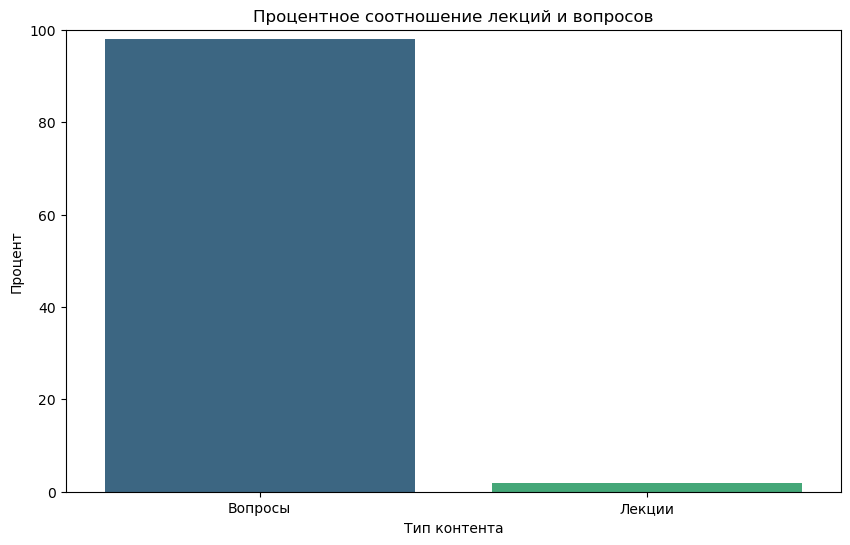

In [13]:
# Количество лекций и вопросов (диаграмма)
# Расчет процентов
total_count = pivot_counts['count'].sum()
pivot_counts['percentage'] = (pivot_counts['count'] / total_count) * 100

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='content_type', y='percentage', data=pivot_counts, palette='viridis')
plt.title('Процентное соотношение лекций и вопросов')
plt.xlabel('Тип контента')
plt.ylabel('Процент')
plt.ylim(0, 100)  # Установка пределов по оси Y от 0 до 100
plt.show()

In [51]:
pivot_counts['percentage'] = (pivot_counts['count'] / total_count) * 100
pivot_counts['percentage']

0    98.04604
1     1.95396
Name: percentage, dtype: float64

In [14]:
# Подсчет уникальных пользователей в наборе данных train
unique_users = train.user_id.nunique()
print(unique_users)

39491


In [15]:
# посмотрим ответы по каждому пользователю
# Группировка данных
user_answer = train[['user_id', 'user_answer', 'answered_correctly']].groupby(['user_id'], as_index=False).sum()

# Удаление пользователей с нулевым количеством ответов
user_answer = user_answer[user_answer['user_answer'] > 0]

# функция для удаления выбросов
def remove_outliers(df,col,n_std):
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
        return df

user_answer = remove_outliers(user_answer, 'user_answer', 1)

# Расчет коэффициента корректных ответов
user_answer['cor'] = user_answer['answered_correctly']/user_answer['user_answer']

# Переименование столбца
user_answer.rename(columns={'user_answer': 'number_of_answers_per_user'}, inplace=True)

# Вывод первых строк
print(user_answer.head())

   user_id  number_of_answers_per_user  answered_correctly       cor
0      115                          72                  32  0.444444
1      124                          49                   7  0.142857
2     2746                          31                  10  0.322581
3     5382                         169                  81  0.479290
4     8623                         149                  67  0.449664


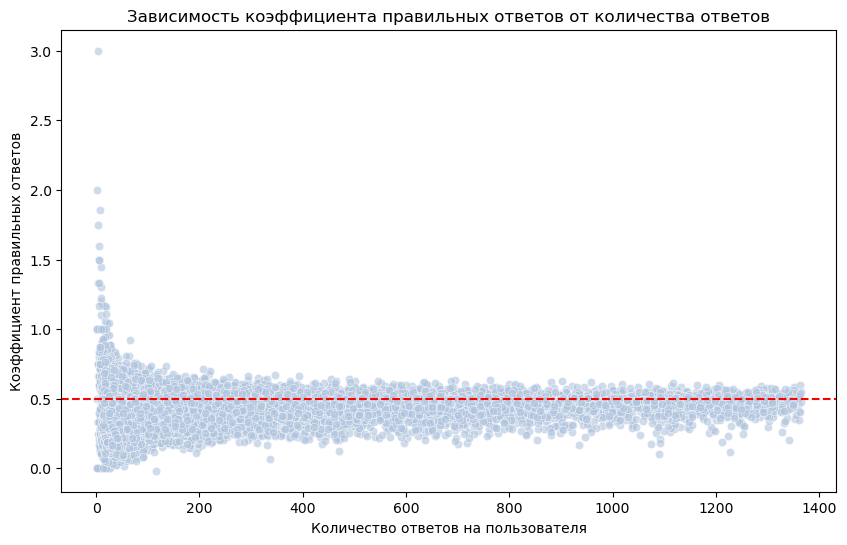

In [16]:
# Рассеяние (Scatter Plot) для анализа зависимости между количеством ответов и коэффициентом правильных ответов.
# График покажет, есть ли связь между количеством ответов и коэффициентом правильных ответов.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_answers_per_user', y='cor', data=user_answer, alpha=0.6, color='#B0C4DE')
plt.title('Зависимость коэффициента правильных ответов от количества ответов')
plt.xlabel('Количество ответов на пользователя')
plt.ylabel('Коэффициент правильных ответов')
plt.axhline(0.5, color='red', linestyle='--')
plt.show()

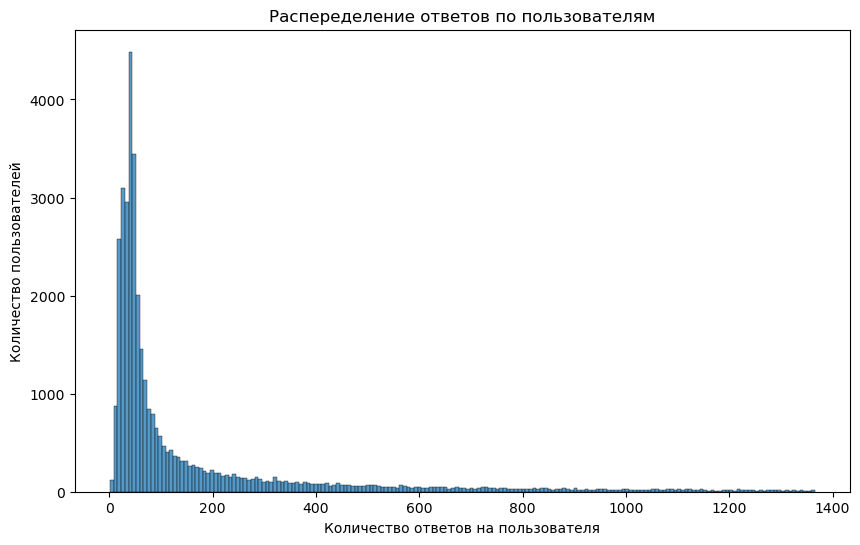

In [17]:
# Распеределение ответов по пользователям
plt.figure(figsize=(10, 6))
sns.histplot(data = user_answer, x = 'number_of_answers_per_user')
plt.title('Распеределение ответов по пользователям')
plt.xlabel('Количество ответов на пользователя')
plt.ylabel('Количество пользователей')
plt.show()

In [18]:
# Для более удобного анализа времени преобразуем значения времени из миллисекунд в секунды
train['prior_question_elapsed_time_seconds'] = train['prior_question_elapsed_time'] / 1000
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,prior_question_elapsed_time_seconds
0,0,0,115,5692,0,1,3,1,NaN,<NA>,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False,37.0
2,2,118363,115,128,0,0,0,1,55000.0,False,55.0
3,3,131167,115,7860,0,3,0,1,19000.0,False,19.0
4,4,137965,115,7922,0,4,1,1,11000.0,False,11.0


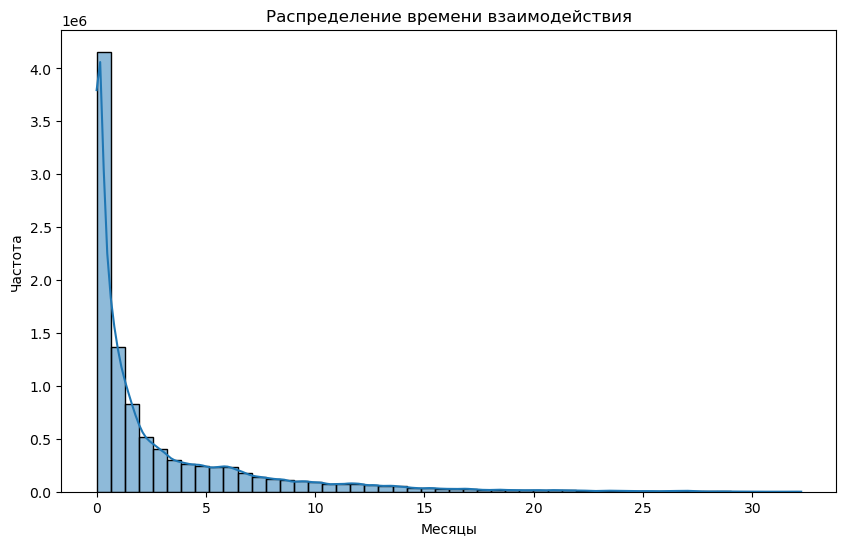

In [19]:
# Время между взаимодействием c системой и активностью пользователя
#1 year = 31536000000 ms
ts = train['timestamp']/(31536000000/12)
plt.figure(figsize=(10, 6))
sns.histplot(ts, bins=50, kde=True)
plt.title('Распределение времени взаимодействия')
plt.xlabel('Месяцы')
plt.ylabel('Частота')
plt.show()


In [20]:
# Фильтрация DataFrame, чтобы исключить значения -1
filtered_train = train[(train['answered_correctly'] != -1) & (train['user_answer'] != -1)]

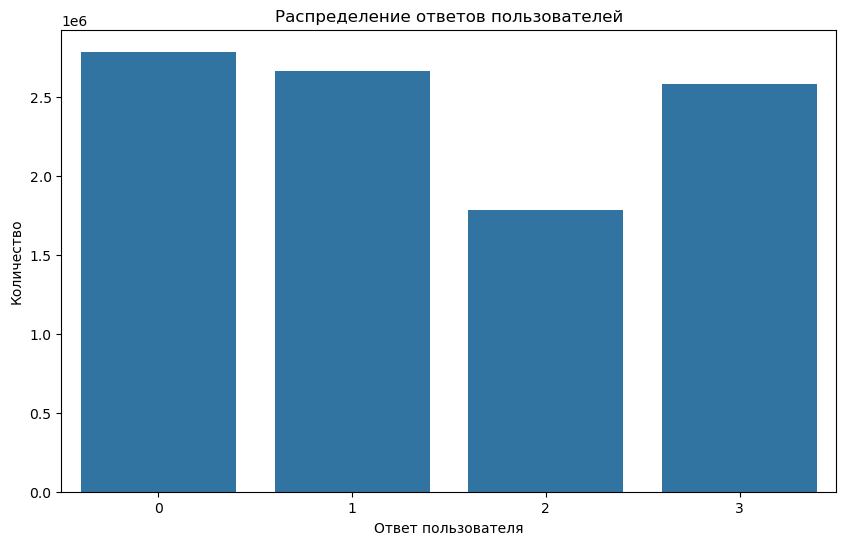

In [21]:
# Ответы пользователей
plt.figure(figsize=(10, 6))
sns.countplot(x='user_answer', data=filtered_train)
plt.title('Распределение ответов пользователей')
plt.xlabel('Ответ пользователя')
plt.ylabel('Количество')
plt.show()


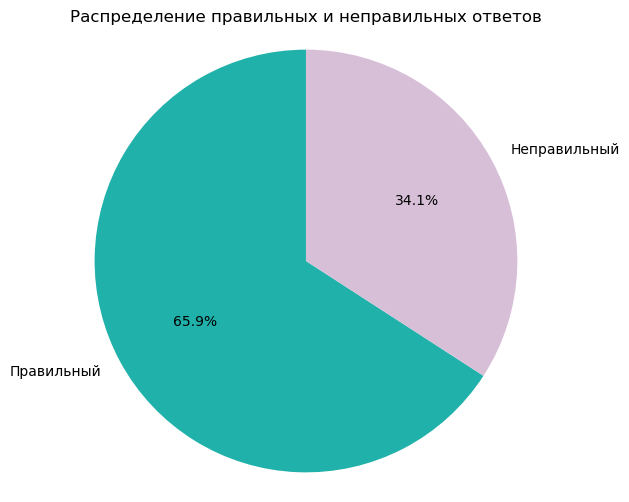

In [22]:
# Анализ правильных ответов
# Создание круговой диаграммы
counts = filtered_train['answered_correctly'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=['Правильный', 'Неправильный'], autopct='%1.1f%%', startangle=90, colors=['#20B2AA', '#D8BFD8'])
plt.title('Распределение правильных и неправильных ответов')
plt.axis('equal')
plt.show()

In [23]:
pivot_time_correctness = filtered_train.pivot_table(
    index='answered_correctly',
    values='prior_question_elapsed_time_seconds',
    aggfunc='mean'
)

pivot_time_correctness['prior_question_elapsed_time_seconds'] = pivot_time_correctness['prior_question_elapsed_time_seconds'].round(1)

# Переименование индексов и значений
pivot_time_correctness.index = pivot_time_correctness.index.map({0: 'Неправильный ответ', 1: 'Правильный ответ'})
pivot_time_correctness.rename(columns={'prior_question_elapsed_time_seconds': 'Среднее время ответа в секундах'}, inplace=True)
pivot_time_correctness.rename_axis('Правильность ответа', inplace=True)

pivot_time_correctness

,Среднее время ответа в секундах
Правильность ответа,
Неправильный ответ,25.7
Правильный ответ,25.4


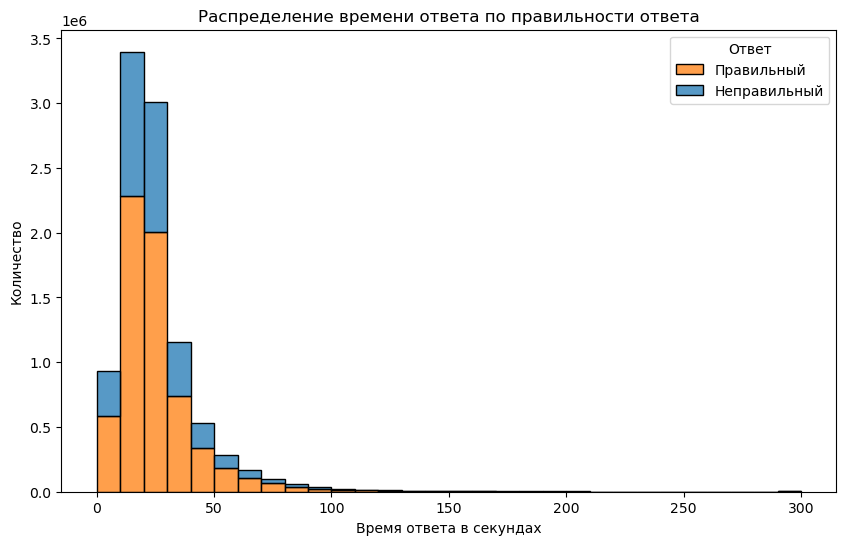

In [24]:
# Время ответа и правильность
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_train, x='prior_question_elapsed_time_seconds', hue='answered_correctly', multiple='stack', bins=30)
plt.title('Распределение времени ответа по правильности ответа')
plt.legend(title='Ответ', labels=['Правильный', 'Неправильный'])
plt.xlabel('Время ответа в секундах')
plt.ylabel('Количество')
plt.show()

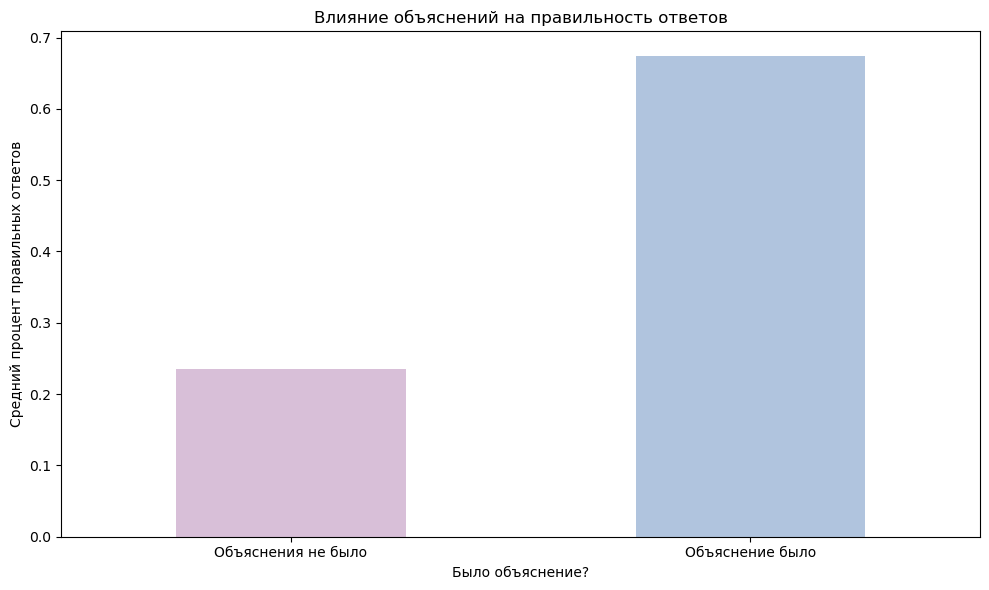

In [25]:
# Проверяем, как наличие объяснений влияет на правильность ответов:
explanation_correct = train.groupby('prior_question_had_explanation')['answered_correctly'].mean()
plt.figure(figsize=(10, 6))
explanation_correct.plot(kind='bar', color=['#D8BFD8', '#B0C4DE'])
plt.title('Влияние объяснений на правильность ответов')
plt.xlabel('Было объяснение?')
plt.ylabel('Средний процент правильных ответов')
plt.xticks(ticks=[0, 1], labels=['Объяснения не было', 'Объяснение было'], rotation=0)
plt.tight_layout()
plt.show()

**Анализ questions**

In [26]:
# Получение информации о столбцах DataFrame questions
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [27]:
# Смотрим структуру и содержимое данных questions
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [28]:
# Подсчет пропущенных значений в каждом столбце
missing_values = questions.isnull().sum()
print(missing_values[missing_values > 0])

tags    1
dtype: int64


In [29]:
questions.dropna(inplace=True)

In [30]:
# Подсчет уникальных question id в наборе данных questions
question_id_unique = len(questions['question_id'].value_counts())
print('Уникальных question IDs:', question_id_unique)

# Подсчет уникальных bundle id в наборе данных questions
bundle_id_unique = questions['bundle_id'].nunique()
print('Уникальных bundle IDs:', bundle_id_unique)

Уникальных question IDs: 13522
Уникальных bundle IDs: 9764


In [53]:
# Подсчет количества вопросов по частям теста
part_counts = questions['part'].value_counts()

# Подсчет общего количества вопросов
total_questions = part_counts.sum()

# Создание сводной таблицы с процентами
part_percentage = (part_counts / total_questions) * 100

# Преобразование в DataFrame
part_percentage_df = part_percentage.round(1).reset_index()
part_percentage_df.columns = ['Part', 'Percentage']

# Вывод сводной таблицы
print(part_percentage_df)

   Part  Percentage
0     5        40.8
1     2        12.2
2     3        11.6
3     4        10.6
4     6         9.0
5     7         8.6
6     1         7.3


/var/folders/zf/cg3sbbt500x0hs8pwdn7nmnm0000gn/T/ipykernel_21947/2475108791.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=part_counts.index, y=part_counts.values, palette='viridis')


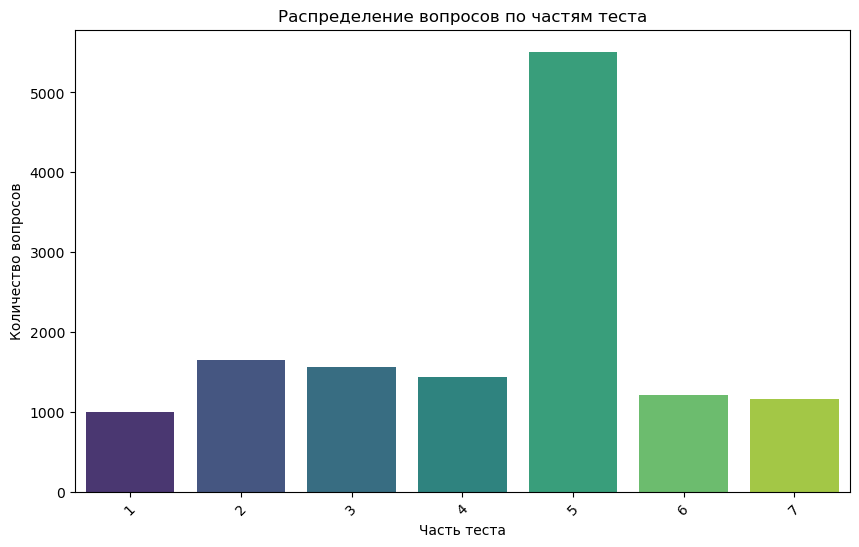

In [31]:
# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x=part_counts.index, y=part_counts.values, palette='viridis')
plt.title('Распределение вопросов по частям теста')
plt.xlabel('Часть теста')
plt.ylabel('Количество вопросов')
plt.xticks(rotation=45)
plt.show()

**Анализ lectures**

In [32]:
# Получение информации о столбцах DataFrame lectures
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [33]:
# Смотрим структуру и содержимое данных lectures
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [34]:
# Подсчет пропущенных значений в каждом столбце
missing_values = lectures.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [35]:
# Подсчет уникальных lecture id в наборе данных lectures
lecture_id_unique = len(lectures['lecture_id'].value_counts())
print('Уникальных lecture IDs:', lecture_id_unique)

# Подсчет уникальных tags в наборе данных lectures
tag_unique = len(lectures['tag'].value_counts())
print('Уникальных tags:', tag_unique)

Уникальных lecture IDs: 418
Уникальных tags: 151


In [61]:
# Подсчет количества лекций по частям теста
part_counts = lectures['part'].value_counts()

# Подсчет общего количества лекций
total_lectures = part_counts.sum()

# Создание сводной таблицы с процентами
part_percentage = (part_counts / total_lectures) * 100

# Преобразование в DataFrame
part_percentage_df = part_percentage.round(1).reset_index()
part_percentage_df.columns = ['Part', 'Percentage']

# Вывод сводной таблицы
print(part_percentage_df)

   Part  Percentage
0     5        34.2
1     6        19.9
2     2        13.4
3     1        12.9
4     7         7.7
5     4         7.4
6     3         4.5


/var/folders/zf/cg3sbbt500x0hs8pwdn7nmnm0000gn/T/ipykernel_21947/245287926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=part_counts.index, y=part_counts.values, palette='viridis')


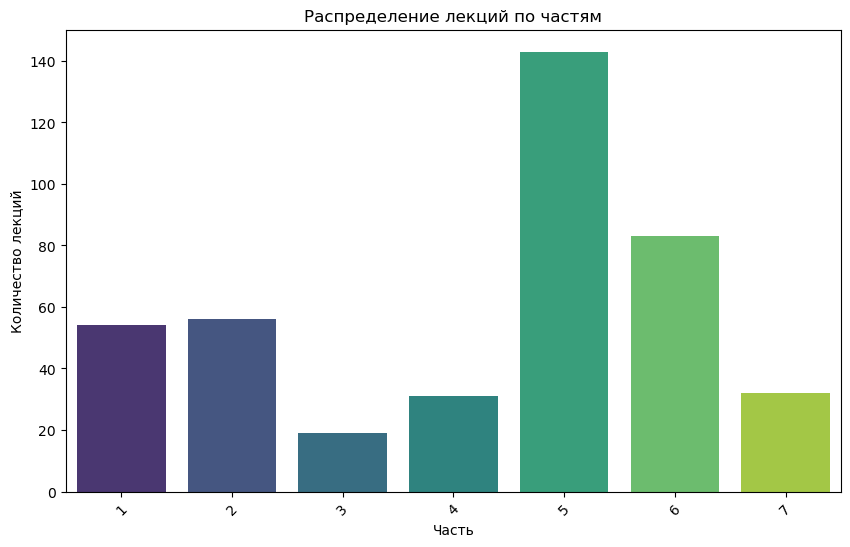

In [36]:
# Распределение лекций по частям
plt.figure(figsize=(10, 6))
sns.barplot(x=part_counts.index, y=part_counts.values, palette='viridis')
plt.title('Распределение лекций по частям')
plt.xlabel('Часть')
plt.ylabel('Количество лекций')
plt.xticks(rotation=45)
plt.show()

/var/folders/zf/cg3sbbt500x0hs8pwdn7nmnm0000gn/T/ipykernel_21947/876606156.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.index[:20], y=tag_counts.values[:20], palette='plasma')  # Топ-20 тегов


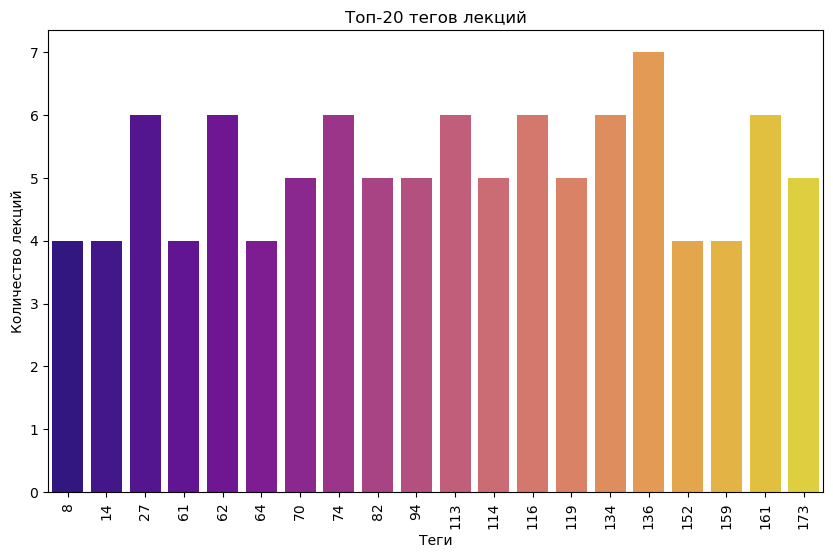

In [37]:
# Анализ по тегам
tag_counts = lectures['tag'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.index[:20], y=tag_counts.values[:20], palette='plasma')  # Топ-20 тегов
plt.title('Топ-20 тегов лекций')
plt.xlabel('Теги')
plt.ylabel('Количество лекций')
plt.xticks(rotation=90)
plt.show()

In [60]:
# Подсчет количества лекций по типу
type_counts = lectures['type_of'].value_counts()

# Подсчет общего количества лекций
total_lectures = type_counts.sum()

# Создание сводной таблицы с процентами
type_percentage = (type_counts / total_lectures) * 100

# Преобразование в DataFrame
type_percentage_df = type_percentage.round(1).reset_index()
type_percentage_df.columns = ['Type', 'Percentage']

# Вывод сводной таблицы
print(type_percentage_df)

               Type  Percentage
0           concept        53.1
1  solving question        44.5
2         intention         1.7
3           starter         0.7


/var/folders/zf/cg3sbbt500x0hs8pwdn7nmnm0000gn/T/ipykernel_21947/1548667062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='mako')


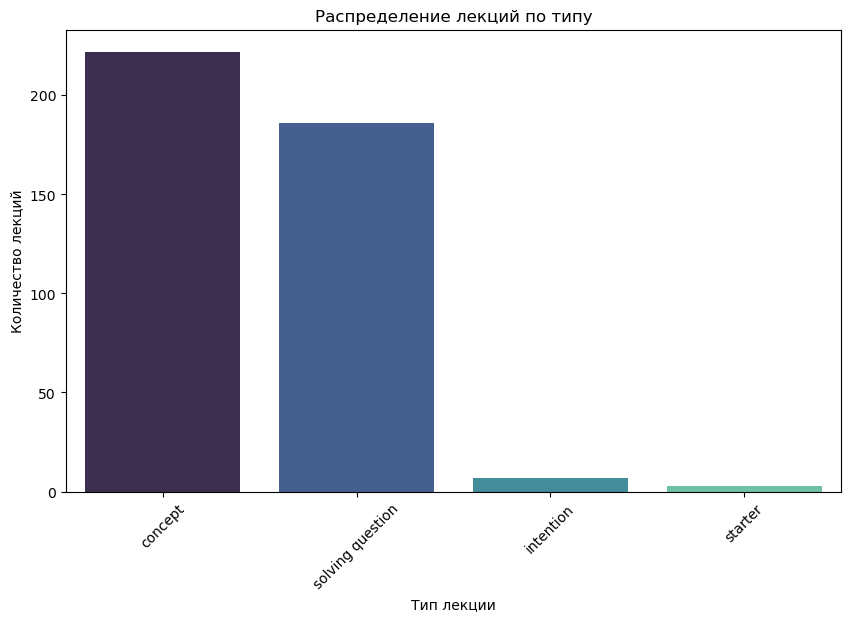

In [38]:
# Анализ по типу лекций
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='mako')
plt.title('Распределение лекций по типу')
plt.xlabel('Тип лекции')
plt.ylabel('Количество лекций')
plt.xticks(rotation=45)
plt.show()

**Обьединение данных**

In [39]:
# Создание нового DataFrame для объединенных данных
merged_data = pd.DataFrame()

# Объединение с lectures, если content_type_id == 1
lectures_data = train[train['content_type_id'] == 1].merge(lectures, left_on='content_id', right_on='lecture_id', how='left')

# Объединение с questions, если content_type_id == 0
questions_data = train[train['content_type_id'] == 0].merge(questions, left_on='content_id', right_on='question_id', how='left')

# Объединение всех данных в один DataFrame
merged_data = pd.concat([lectures_data, questions_data], ignore_index=True)


In [40]:
# Количество строк в merged_data
num_rows = merged_data.shape[0]
num_rows

10000000

In [41]:
# Создание сводной таблицы для подсчета количества лекций и вопросов
pivot_counts = merged_data.groupby('content_type_id').size().reset_index(name='count')

# Замена значений content_type_id на более понятные
pivot_counts['content_type'] = pivot_counts['content_type_id'].map({0: 'Вопросы', 1: 'Лекции'})

# Удаление ненужного столбца
pivot_counts.drop(columns=['content_type_id'], inplace=True)

# Вывод сводной таблицы
print(pivot_counts)

     count content_type
0  9804604      Вопросы
1   195396       Лекции


In [42]:
# Процент правильных ответов для вопросов
correct_answers = merged_data[merged_data['content_type_id'] == 0]
correct_percentage = correct_answers['answered_correctly'].mean() * 100
print(f"Процент правильных ответов: {correct_percentage:.2f}%")

Процент правильных ответов: 65.86%


In [43]:
# Анализ по частям теста
# Фильтрация данных для вопросов
questions_data = merged_data[merged_data['content_type_id'] == 0]

# Создание сводной таблицы
pivot_table = questions_data.groupby('part')['answered_correctly'].agg(['sum', 'count']).reset_index()

# Переименование столбцов
pivot_table.columns = ['Part', 'Correct Answers', 'Total Questions']

# Вычисление процента правильных ответов
pivot_table['Percentage Correct'] = (pivot_table['Correct Answers'] / pivot_table['Total Questions']) * 100

# Вывод сводной таблицы
print(pivot_table)

   Part  Correct Answers  Total Questions  Percentage Correct
0     1           550822           738264           74.610437
1     2          1324262          1862272           71.110020
2     3           598613           849569           70.460787
3     4           507638           799656           63.482047
4     5          2442575          4005773           60.976371
5     6           701305          1048356           66.895692
6     7           332210           500714           66.347256


/var/folders/zf/cg3sbbt500x0hs8pwdn7nmnm0000gn/T/ipykernel_21947/1641751766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Part', y='Percentage Correct', data=pivot_table, palette='viridis')


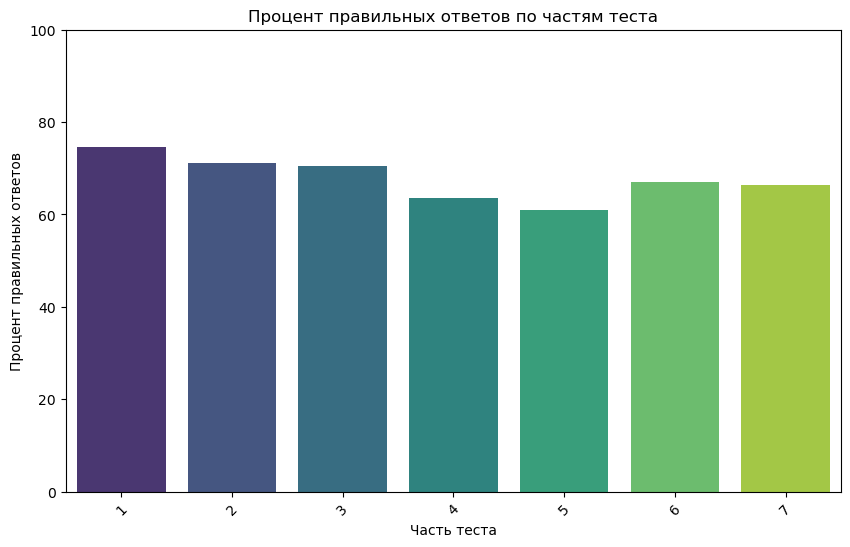

In [44]:
# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='Part', y='Percentage Correct', data=pivot_table, palette='viridis')
plt.title('Процент правильных ответов по частям теста')
plt.xlabel('Часть теста')
plt.ylabel('Процент правильных ответов')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Установка пределов по оси Y от 0 до 100
plt.show()

In [45]:
# Анализ по тегам
# Разделение тегов и создание нового DataFrame
questions_data['tags'] = questions_data['tags'].str.split(' ')
exploded_tags = questions_data.explode('tags')  # Создание новой строки для каждого тега


/var/folders/zf/cg3sbbt500x0hs8pwdn7nmnm0000gn/T/ipykernel_21947/3446059451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_data['tags'] = questions_data['tags'].str.split(' ')  # Предполагаем, что теги разделены пробелами


In [46]:
# Проверка результата
exploded_tags.head(20)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,prior_question_elapsed_time_seconds,lecture_id,tag,part,type_of,question_id,bundle_id,correct_answer,tags
195396,0,0,115,5692,0,1,3,1,NaN,<NA>,NaN,NaN,NaN,5,NaN,5692.0,5692.0,3.0,151
195397,1,56943,115,5716,0,2,2,1,37000.0,False,37.0,NaN,NaN,5,NaN,5716.0,5716.0,2.0,168
195398,2,118363,115,128,0,0,0,1,55000.0,False,55.0,NaN,NaN,1,NaN,128.0,128.0,0.0,131
195398,2,118363,115,128,0,0,0,1,55000.0,False,55.0,NaN,NaN,1,NaN,128.0,128.0,0.0,149
195398,2,118363,115,128,0,0,0,1,55000.0,False,55.0,NaN,NaN,1,NaN,128.0,128.0,0.0,92
195399,3,131167,115,7860,0,3,0,1,19000.0,False,19.0,NaN,NaN,1,NaN,7860.0,7860.0,0.0,131
195399,3,131167,115,7860,0,3,0,1,19000.0,False,19.0,NaN,NaN,1,NaN,7860.0,7860.0,0.0,104
195399,3,131167,115,7860,0,3,0,1,19000.0,False,19.0,NaN,NaN,1,NaN,7860.0,7860.0,0.0,81
195400,4,137965,115,7922,0,4,1,1,11000.0,False,11.0,NaN,NaN,1,NaN,7922.0,7922.0,1.0,131
195400,4,137965,115,7922,0,4,1,1,11000.0,False,11.0,NaN,NaN,1,NaN,7922.0,7922.0,1.0,149


In [47]:
# Группировка по тегам и расчет среднего значения правильных ответов
tag_performance = exploded_tags.groupby('tags')['answered_correctly'].mean().reset_index()

# Переименование столбцов
tag_performance.columns = ['Tag', 'Percentage Correct']

# Сортировка по проценту правильных ответов
tag_performance = tag_performance.sort_values(by='Percentage Correct', ascending=False)

In [48]:
# Теги с наибольшим процентом правильных ответов
highest_correct = tag_performance.head(10)

# Теги с наименьшим процентом правильных ответов
lowest_correct = tag_performance.tail(10)

# Вывод результатов
print("Теги с наибольшим процентом правильных ответов:")
print(highest_correct)

print("Теги с наименьшим процентом правильных ответов:")
print(lowest_correct)

Теги с наибольшим процентом правильных ответов:
     Tag  Percentage Correct
153   68            0.866896
98   187            0.860553
36   130            0.850496
56   149            0.848703
123   40            0.816079
181   93            0.809814
156   70            0.806310
87   177            0.798032
163   77            0.797028
37   131            0.796217
Теги с наименьшим процентом правильных ответов:
     Tag  Percentage Correct
13    11            0.525458
107   26            0.512275
134   50            0.510849
76   167            0.506756
142   58            0.505235
11   108            0.503189
59   151            0.489855
99    19            0.444791
104   23            0.440688
105   24            0.383421


/var/folders/zf/cg3sbbt500x0hs8pwdn7nmnm0000gn/T/ipykernel_21947/20336820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage Correct', y='Tag', data=combined_tags, palette='plasma')


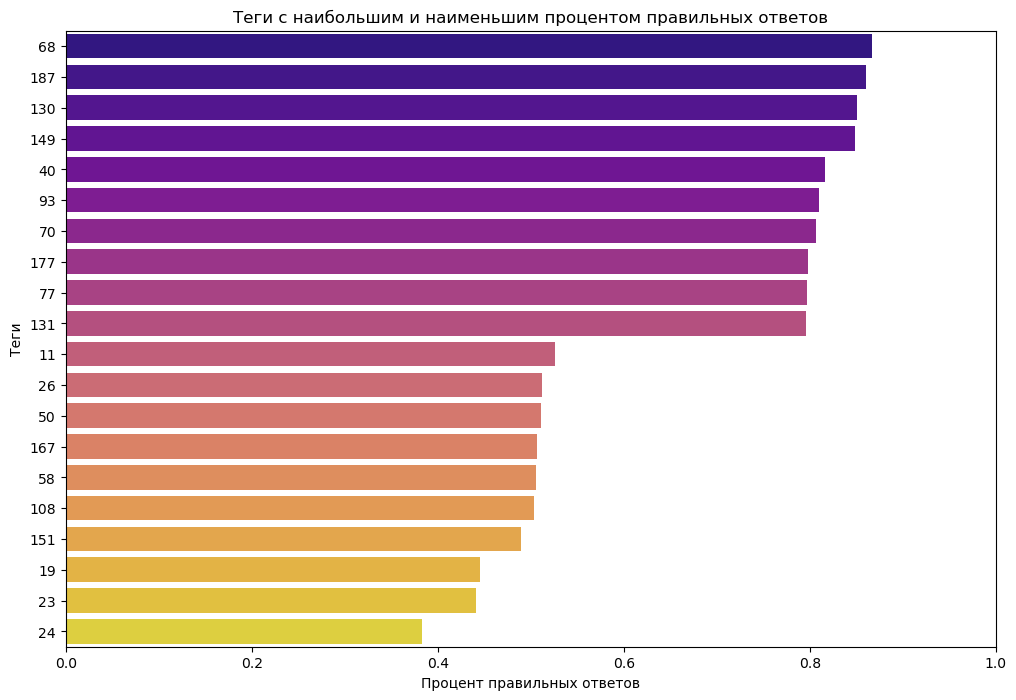

In [49]:
# Объединение данных
combined_tags = pd.concat([highest_correct, lowest_correct])

# Создание столбчатой диаграммы
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage Correct', y='Tag', data=combined_tags, palette='plasma')
plt.title('Теги с наибольшим и наименьшим процентом правильных ответов')
plt.xlabel('Процент правильных ответов')
plt.ylabel('Теги')
plt.xlim(0, 1)  # Установка пределов по оси X от 0 до 1
plt.show()

### Вывод

1. **Общее распределение контента**: 
   - Анализ показал, что существует значительное различие между количеством вопросов и лекций (98% и 2% соответственно).

2. **Процент правильных ответов**: 
   - Процент правильных ответов составил 65%.

3. **Время ответа**: 
   - Время затраченное на ответ, не влияет на правильность.
   - В среднем пользователи тратят на ответ на вопрос 25 секунд.

4. **Пользовательское поведение**: 
   - Активность пользователей на платформе уменьшается со временем.
   - Данные показывают, что если ппредыдущий вопрос имел объяснение, то вероятность, что пользователь даст правильный ответ, увеличивается в 2 раза.

5. **Распределение вопросов**: 
   - На платформе 13522 по 7 темам.
   - Наибольшее количество вопросов приходится на 5-ю тему (41%).

6. **Распределение лекций**: 
   - На платформе 418 лекций по 7 темам.
   - Наибольшее количество лекций приходится на 5-ю тему (34%).
   - Лекции неравномерно распределены на 4 типа. На типы лекций "concept" и "solving question" приходится 53% и 44.5% соответственно.

7. **Теги**: 
   - Определены теги с наибольшим и наимешим количеством правильных ответов.
